# Cancer Screening Machine Learning Model

Data source: [Breast Cancer Center of Wisconsin](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

The goal of this project is to take feature data to build a model to predict if a sample is malignant (cancerous) or benign (cancer-free).  The model is built using a supervised machine learning approach, utilizing K-nearest-neighbor techniques.  The model is simple in form and demonstrates a baseline understanding of utilizing machine learning models in python.  Libraries and methods used include Sklearn, Numpy, & Pandas.

In [1]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()


### Step 1: Explore Data

In [2]:
cancer.keys() # how to access datapoints

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [3]:
len(cancer['feature_names']) # How many features are in the dataset

30

In [4]:
def df_builder(): # convert to dataframe
    data = cancer
    df = pd.DataFrame(data.data, columns=data.feature_names)
    target = cancer['target']
    df['target'] = target
    return df    
df_builder().head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df_builder().shape # shape of df

(569, 31)

In [6]:
def class_maker(): # See split of data
    cancerdf = df_builder()
    target = pd.Series(cancerdf['target'])
    target = target.value_counts()
    target = target.rename({0 : 'malignant', 1: 'benign'})
    target = target.reindex(['malignant', 'benign'])
    return target
print(class_maker()[0]/class_maker()[1]) # data is not a 50/50 split between target types, skewed to more benign data to train on
class_maker()

0.5938375350140056


malignant    212
benign       357
Name: target, dtype: int64

### Step 2: Build Model

In [7]:
# Split data between features and labels
def splits():
    cancerdf = df_builder()  
    y = cancerdf['target']
    X = cancerdf[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
    'mean smoothness', 'mean compactness', 'mean concavity',
    'mean concave points', 'mean symmetry', 'mean fractal dimension',
    'radius error', 'texture error', 'perimeter error', 'area error',
    'smoothness error', 'compactness error', 'concavity error',
    'concave points error', 'symmetry error', 'fractal dimension error',
    'worst radius', 'worst texture', 'worst perimeter', 'worst area',
    'worst smoothness', 'worst compactness', 'worst concavity',
    'worst concave points', 'worst symmetry', 'worst fractal dimension']]
    return X, y

In [8]:
# splice into train/test sets
from sklearn.model_selection import train_test_split
# use random state = 0
def train_test():
    X, y = splits()
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    return X_train, X_test, y_train, y_test

### Step 3: Train Model

In [9]:
from sklearn.neighbors import KNeighborsClassifier

def train_model():
    X_train, X_test, y_train, y_test = train_test()
    knn = KNeighborsClassifier(n_neighbors = 3) # using three closest neighbors
    model = knn.fit(X_train, y_train)
    return model


### Step 4: Test Model

In [10]:
def test_model():
    X_train, X_test, y_train, y_test = train_test()
    knn = train_model()
    p = knn.predict(X_test.values)
    return p

In [11]:
# overall test accuracy score
def score():
    X_train, X_test, y_train, y_test = train_test()
    knn = train_model()
    score_train = knn.score(X_train, y_train)
    score_test = knn.score(X_test, y_test)
    return score_train, score_test, score_train-score_test
score()

(0.9577464788732394, 0.9230769230769231, 0.034669555796316254)

In [12]:
# confusion matrix
def matrix():
    X_train, X_test, y_train, y_test = train_test()
    matrix = sklearn.metrics.confusion_matrix(y_test, test_model())
    return matrix
matrix()
# 0 1 
# 1 0

array([[48,  5],
       [ 6, 84]])

<IPython.core.display.Javascript object>


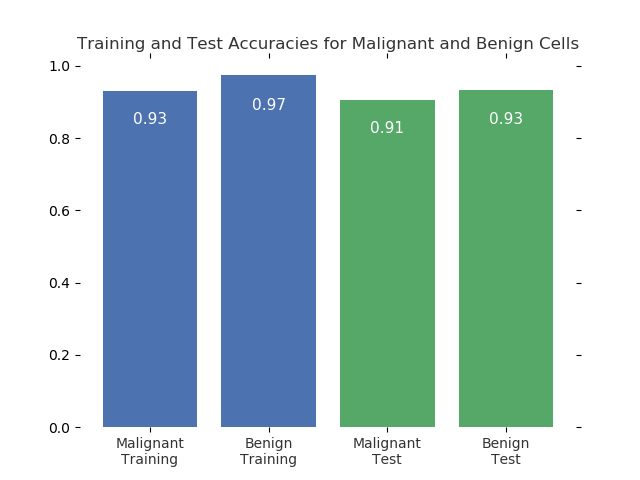

In [14]:
def accuracy_plot():
    import matplotlib.pyplot as plt

    %matplotlib notebook

    X_train, X_test, y_train, y_test = train_test()

    # Find the training and testing accuracies by target value (i.e. malignant, benign)
    mal_train_X = X_train[y_train==0]
    mal_train_y = y_train[y_train==0]
    ben_train_X = X_train[y_train==1]
    ben_train_y = y_train[y_train==1]

    mal_test_X = X_test[y_test==0]
    mal_test_y = y_test[y_test==0]
    ben_test_X = X_test[y_test==1]
    ben_test_y = y_test[y_test==1]

    knn = train_model()

    scores = [knn.score(mal_train_X, mal_train_y), knn.score(ben_train_X, ben_train_y), 
              knn.score(mal_test_X, mal_test_y), knn.score(ben_test_X, ben_test_y)]


    plt.figure()

    # Plot the scores as a bar chart
    bars = plt.bar(np.arange(4), scores, color=['#4c72b0','#4c72b0','#55a868','#55a868'])

    # directly label the score onto the bars
    for bar in bars:
        height = bar.get_height()
        plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), 
                     ha='center', color='w', fontsize=11)

    # remove all the ticks (both axes), and tick labels on the Y axis
    plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

    # remove the frame of the chart
    for spine in plt.gca().spines.values():
        spine.set_visible(False)

    plt.xticks([0,1,2,3], ['Malignant\nTraining', 'Benign\nTraining', 'Malignant\nTest', 'Benign\nTest'], alpha=0.8);
    plt.title('Training and Test Accuracies for Malignant and Benign Cells', alpha=0.8)
    
accuracy_plot()

## Findings

The KNN model appears to be have a relveant findings as to its potential to anazlyze and accurately predict the the cancerous features of a breast sample.  The test accuracy score highlights as greater than 90% accurate.  While objectively high, because we are working with medical data and the impact of such diagnosis can mean life/death in some cases, the overall sentiment towards the benefit of the model will be refrained and needs to be considered in light of the accuracy rate of other models or controlled for human-only testing results.  

The model relies on three nearest neighbors to thwart against overfitting the data.  Consequently, it appears that we have controlled for overfitting as the accuracy dropoff between the training and test data is limited to just 3%.

Finally, it should be noted that while the model overall depicts about 9/10 cases correctly, the least accurate label it attempts to predict is the malignant label, the worst of the two labels to get wrong.  In this case, a high false negative rate is very damaging to to efficacy of the model as missing a cancer diagnosis is much more damaging than misdiagnosing as cancerous.  Nevertheless, the results from building the model appear promising and appears to be fertile ground to dive into exploring feature sensitivity and continued model testing.